In [1]:
%matplotlib notebook
import scipy as sp
import matplotlib as mpl

#mpl_settings = {
#    "font.family": "serif",
#    "font.serif": "Linux Libertine O",
#    "mathtext.fontset": "stix"
#}
#mpl.rcParams.update(mpl_settings)

import matplotlib.pyplot as plt

#sp.set_printoptions(precision=3, suppress=True, linewidth=100,
#                   formatter={'float': lambda x: format(x, '5.2E')})

def dTdt(T, Ts):
    T2 = T1 = t2 = t1 = None
    melted = False
    for time, temp in T:
        melted |= temp > Ts + 100
        if not melted: continue
        if temp < Ts and T1 == None:
            T1 = temp
            t1 = time
        if temp < Ts - 100 and T2 == None:
            T2 = temp
            t2 = time
            break
    
    #print(T2, T1, t2, t1)
    return - (T2 - T1) / (t2 - t1) * 1e3

def MPl(T, Ts, vel):
    t2 = t1 = None
    melted = False
    for time, temp in T:
        if temp > Ts and t1 == None and not melted:
            melted = True
            t1 = time
        if temp < Ts and t2 == None and melted:
            t2 = time
            break
    
    #print(t2, t1)
    return (t2 - t1) * vel * 1e3


def metrics(T, Ts, vel):
    print("CR:  {:.2e} C/s".format(dTdt(pt1, Ts)))
    print("MPl: {:.0f} um".format(MPl(pt1, Ts, vel)))

# Ts = 1531 K

<IPython.core.display.Javascript object>


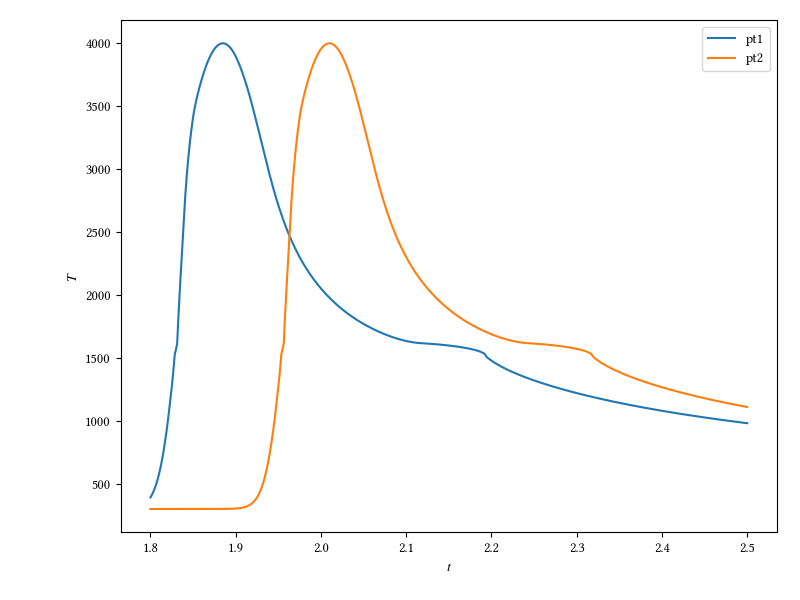

<IPython.core.display.Javascript object>


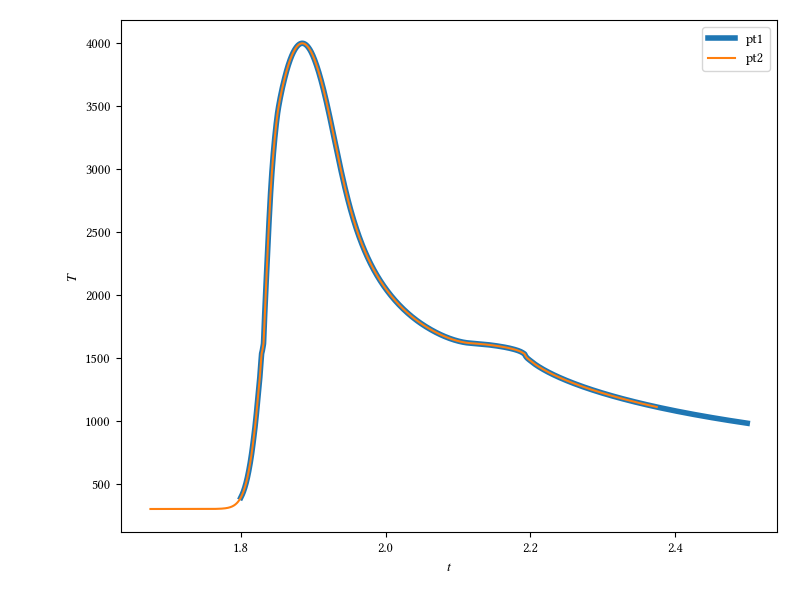

CR:  5.19e+06 C/s
MPl: 291 um


In [2]:
pt1 = sp.loadtxt("/home/zjibben/data/stv/stvB5um/stvB_b2_output/pt1.txt")
pt2 = sp.loadtxt("/home/zjibben/data/stv/stvB5um/stvB_b2_output/pt2.txt")

# fig1
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.1,0.05,1,1])

ax.set_xlabel("$t$")
ax.set_ylabel("$T$")
ax.plot(pt1[:,0], pt1[:,1], '-', label="pt1")
ax.plot(pt2[:,0], pt2[:,1], '-', label="pt2")
ax.legend(loc=1);

# fig2
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.1,0.05,1,1])

ax.set_xlabel("$t$")
ax.set_ylabel("$T$")
ax.plot(pt1[:,0], pt1[:,1], '-', lw=4, label="pt1")
ax.plot(pt2[:,0] - 0.1 / 800e-3, pt2[:,1], '-', label="pt2")
ax.legend(loc=1);

metrics(pt1, 1531, 800e-3)

# 5um

<IPython.core.display.Javascript object>


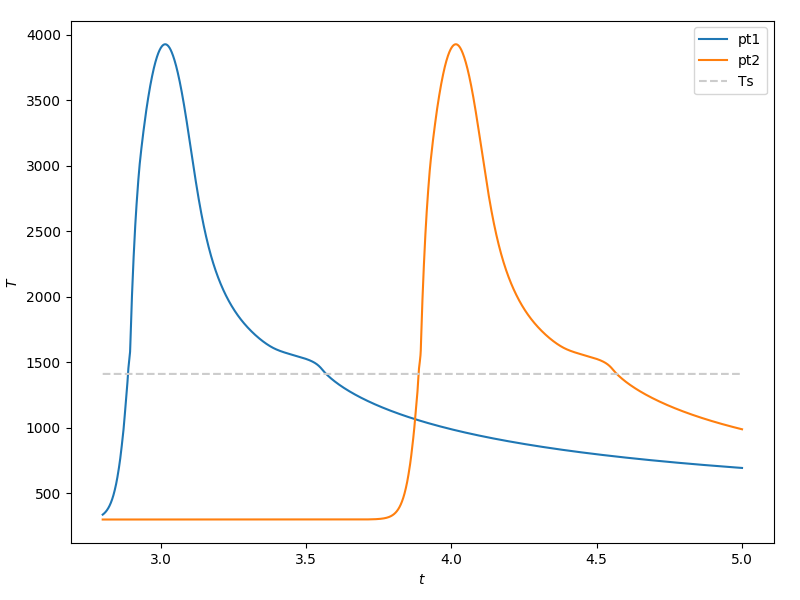

<IPython.core.display.Javascript object>


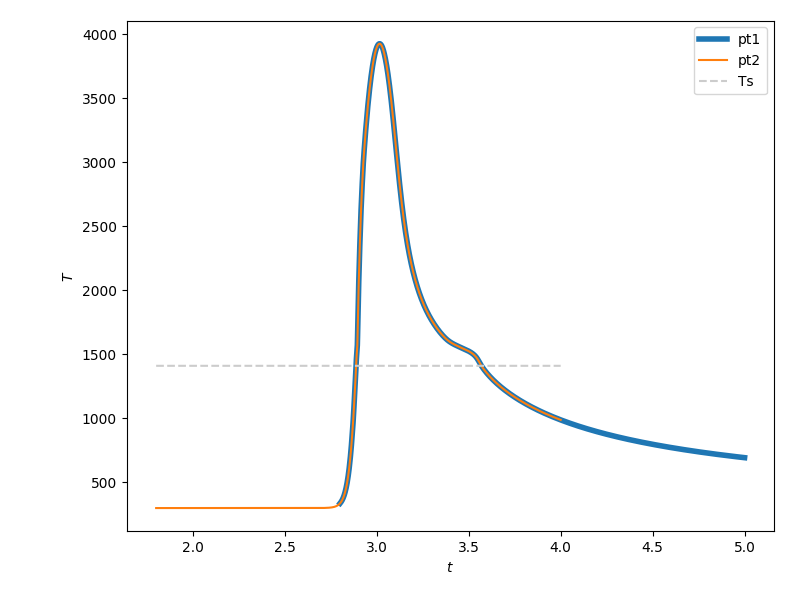

<IPython.core.display.Javascript object>


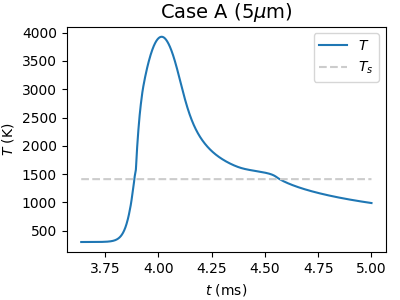

CR:  1.77e+06 C/s
MPl: 273 um
MPw: 160 um
MPd:  50 um


In [2]:
pt1 = sp.loadtxt("stvA5um_pt1.txt")
pt2 = sp.loadtxt("stvA5um_pt2.txt")

# fig1
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.03,0.03,1,1])

#ax.set_title("Case A", fontsize=20)
ax.set_xlabel("$t$")
ax.set_ylabel("$T$")
ax.plot(pt1[:,0], pt1[:,1], '-', label="pt1")
ax.plot(pt2[:,0], pt2[:,1], '-', label="pt2")
ax.plot(pt2[:,0], sp.ones(pt2.shape[0])*1410, '--', color='0.8', label="Ts")
ax.legend(loc=1);

#fig.savefig('figures/stvA.png')

# fig2
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.1,0.05,1,1])

ax.set_xlabel("$t$")
ax.set_ylabel("$T$")
ax.plot(pt1[:,0], pt1[:,1], '-', lw=4, label="pt1")
ax.plot(pt2[:,0] - 0.4 / 400e-3, pt2[:,1], '-', label="pt2")
ax.plot(pt2[:,0] - 0.4 / 400e-3, sp.ones(pt2.shape[0])*1410, '--', color='0.8', label="Ts")
ax.legend(loc=1);

# fig3
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.05,0.03,1.03,0.98])

start=5000
ax.set_title("Case A (5$\mu$m)", fontsize=14)
ax.set_xlabel("$t$ (ms)")
ax.set_ylabel("$T$ (K)")
#ax.plot(pt1[:,0], pt1[:,1], '-', label="pt1")
ax.plot(pt2[start:,0], pt2[start:,1], '-', label="$T$")
ax.plot(pt2[start:,0], sp.ones(pt2.shape[0]-start)*1410, '--', color='0.8', label="$T_s$")
ax.legend(loc=1);

fig.savefig('stvA5um.png', dpi=200)

metrics(pt1, 1410, 400e-3)
print("MPw: 160 um")
print("MPd:  50 um")

<IPython.core.display.Javascript object>


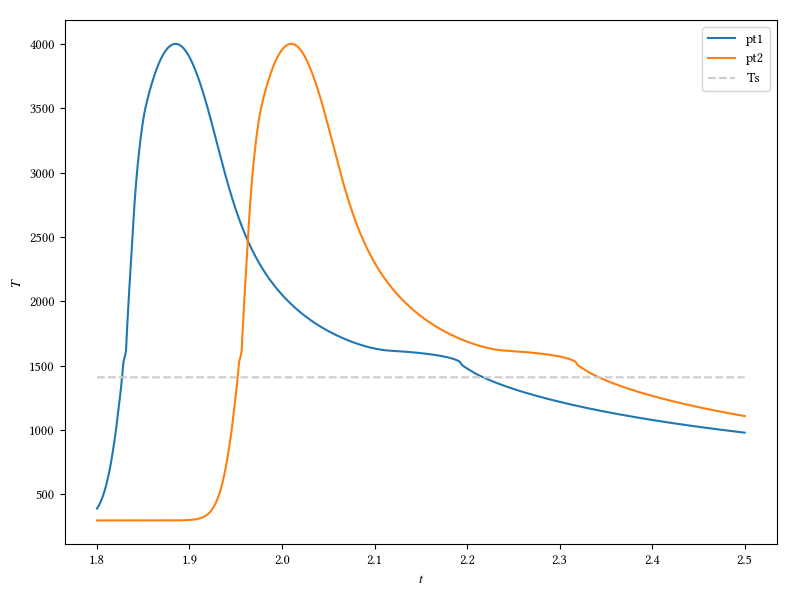

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


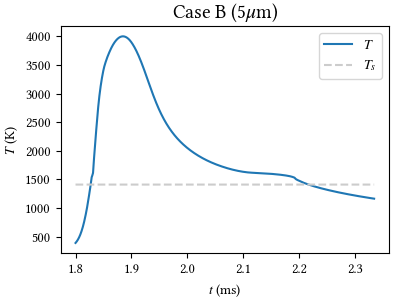

CR:  2.71e+06 C/s
MPl: 312 um
MPw: 130 um
MPd:  40 um


In [5]:
pt1 = sp.loadtxt("stvB5um_pt1.txt")
pt2 = sp.loadtxt("stvB5um_pt2.txt")

# fig1
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.03,0.03,1,1])

#ax.set_title("Case B", fontsize=20)
ax.set_xlabel("$t$")
ax.set_ylabel("$T$")
ax.plot(pt1[:,0], pt1[:,1], '-', label="pt1")
ax.plot(pt2[:,0], pt2[:,1], '-', label="pt2")
ax.plot(pt2[:,0], sp.ones(pt2.shape[0])*1410, '--', color='0.8', label="Ts")
ax.legend(loc=1);

#fig.savefig('figures/stvB.png')

# fig2
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.1,0.05,1,1])

ax.set_xlabel("$t$")
ax.set_ylabel("$T$")
ax.plot(pt1[:,0], pt1[:,1], '-', lw=4, label="pt1")
ax.plot(pt2[:,0] - 0.4 / 800e-3, pt2[:,1], '-', label="pt2")
ax.plot(pt2[:,0] - 0.4 / 800e-3, sp.ones(pt2.shape[0])*1410, '--', color='0.8', label="Ts")
ax.legend(loc=1);

# fig3
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.05,0.03,1.03,0.98])

#start=5000
end=5000
ax.set_title("Case B (5$\mu$m)", fontsize=14)
ax.set_xlabel("$t$ (ms)")
ax.set_ylabel("$T$ (K)")
ax.plot(pt1[:end,0], pt1[:end,1], '-', label="$T$")
ax.plot(pt1[:end,0], sp.ones(end)*1410, '--', color='0.8', label="$T_s$")
ax.legend(loc=1);

fig.savefig('stvB5um.png', dpi=200)

metrics(pt1, 1410, 800e-3)
print("MPw: 130 um")
print("MPd:  40 um")

<IPython.core.display.Javascript object>


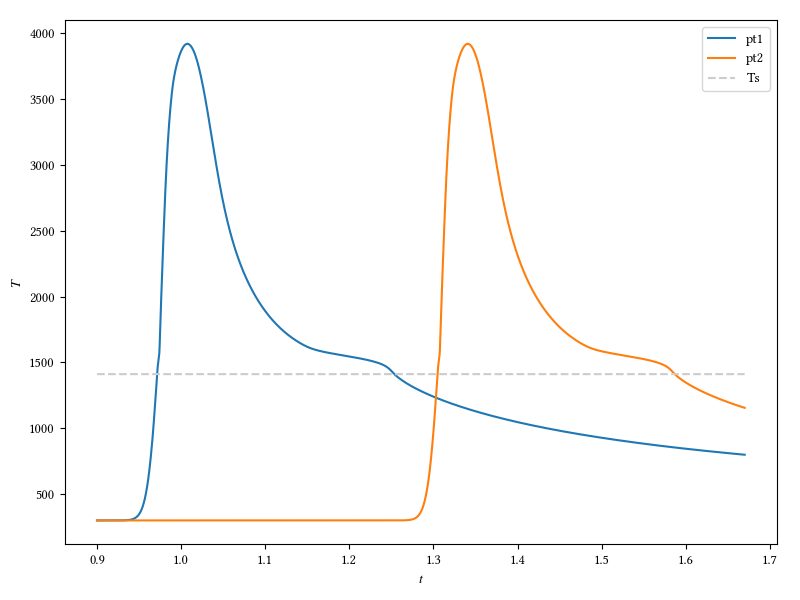

<IPython.core.display.Javascript object>


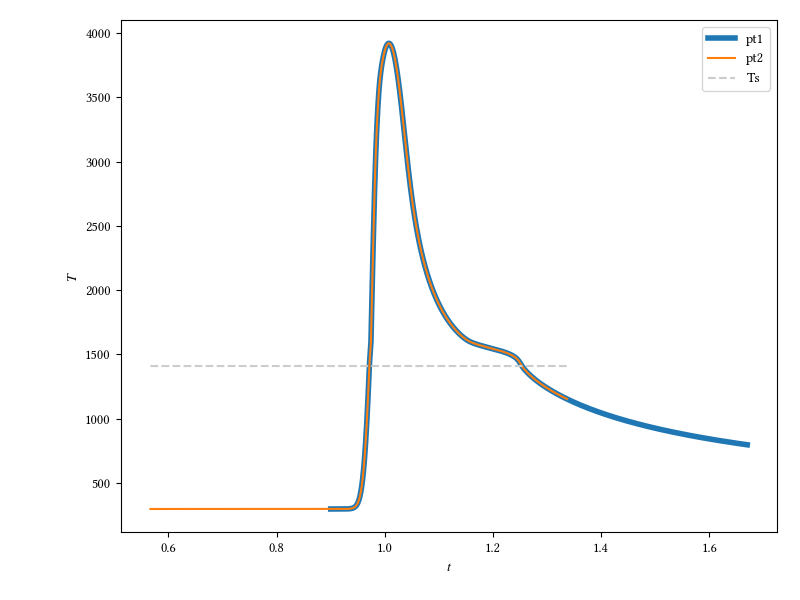

<IPython.core.display.Javascript object>


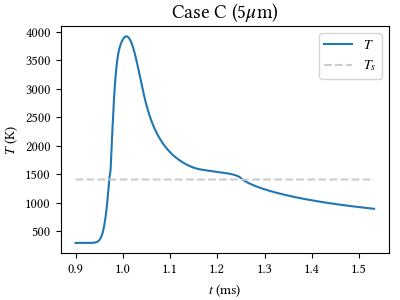

CR:  4.36e+06 C/s
MPl: 338 um
MPw: 120 um
MPd:  35 um


In [6]:
pt1 = sp.loadtxt("stvC5um_pt1.txt")
pt2 = sp.loadtxt("stvC5um_pt2.txt")

# fig1
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.03,0.03,1,1])

#ax.set_title("Case C", fontsize=20)
ax.set_xlabel("$t$")
ax.set_ylabel("$T$")
ax.plot(pt1[:,0], pt1[:,1], '-', label="pt1")
ax.plot(pt2[:,0], pt2[:,1], '-', label="pt2")
ax.plot(pt2[:,0], sp.ones(pt2.shape[0])*1410, '--', color='0.8', label="Ts")
ax.legend(loc=1);

#fig.savefig('figures/stvC.png')

# fig2
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.1,0.05,1,1])

ax.set_xlabel("$t$")
ax.set_ylabel("$T$")
ax.plot(pt1[:,0], pt1[:,1], '-', lw=4, label="pt1")
ax.plot(pt2[:,0] - 0.4 / 1200e-3, pt2[:,1], '-', label="pt2")
ax.plot(pt2[:,0] - 0.4 / 1200e-3, sp.ones(pt2.shape[0])*1410, '--', color='0.8', label="Ts")
ax.legend(loc=1);

# fig3
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.05,0.03,1.03,0.98])

#start=5000
end=4000
ax.set_title("Case C (5$\mu$m)", fontsize=14)
ax.set_xlabel("$t$ (ms)")
ax.set_ylabel("$T$ (K)")
ax.plot(pt1[:end,0], pt1[:end,1], '-', label="$T$")
ax.plot(pt1[:end,0], sp.ones(end)*1410, '--', color='0.8', label="$T_s$")
ax.legend(loc=1);

fig.savefig('stvC5um.png', dpi=200)

metrics(pt1, 1410, 1200e-3)
print("MPw: 120 um")
print("MPd:  35 um")

# 2um

<IPython.core.display.Javascript object>


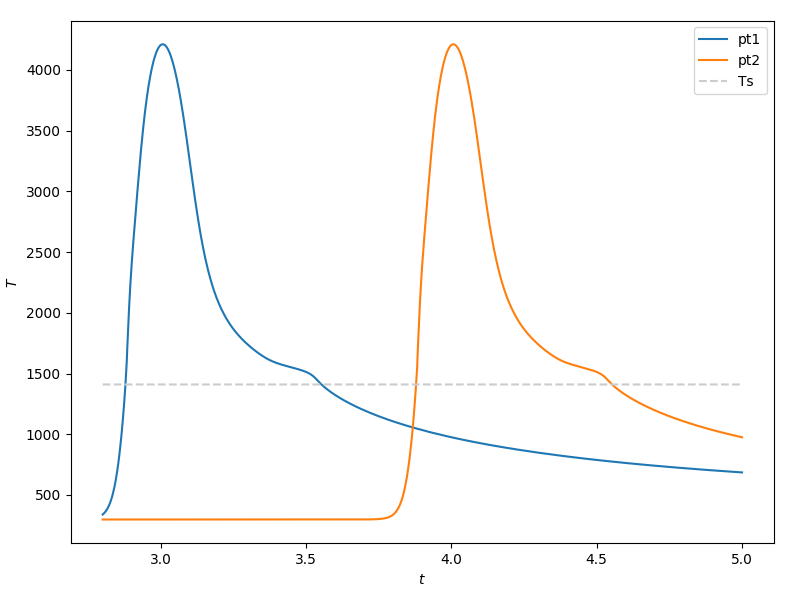

<IPython.core.display.Javascript object>


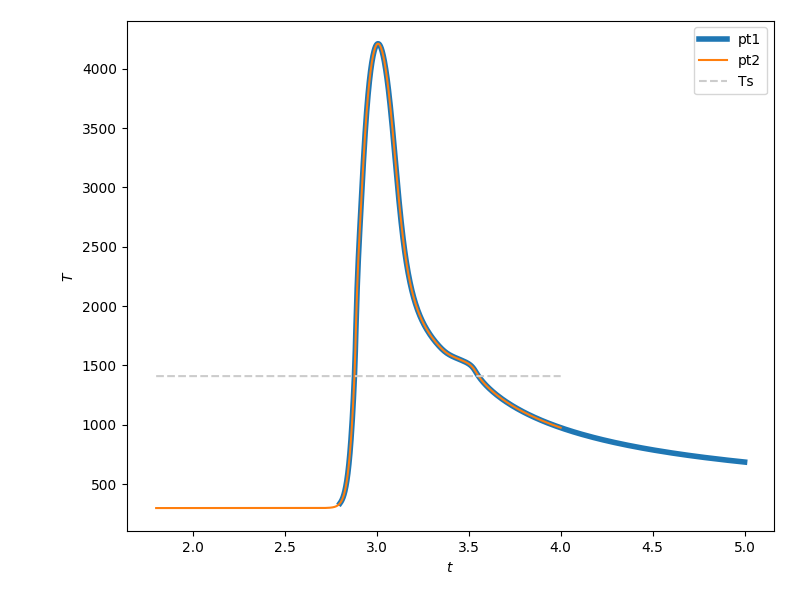

<IPython.core.display.Javascript object>


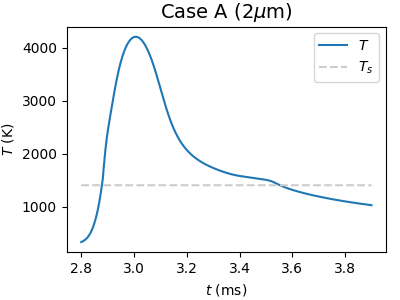

CR:  1.79e+06 C/s
MPl: 270 um
MPw: 150 um
MPd:  45 um


In [8]:
pt1 = sp.loadtxt("stvA2um_pt1.txt")
pt2 = sp.loadtxt("stvA2um_pt2.txt")

# fig1
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.03,0.03,1,1])

#ax.set_title("Case B", fontsize=20)
ax.set_xlabel("$t$")
ax.set_ylabel("$T$")
ax.plot(pt1[:,0], pt1[:,1], '-', label="pt1")
ax.plot(pt2[:,0], pt2[:,1], '-', label="pt2")
ax.plot(pt2[:,0], sp.ones(pt2.shape[0])*1410, '--', color='0.8', label="Ts")
ax.legend(loc=1);

#fig.savefig('figures/stvB.png')

# fig2
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.1,0.05,1,1])

ax.set_xlabel("$t$")
ax.set_ylabel("$T$")
ax.plot(pt1[:,0], pt1[:,1], '-', lw=4, label="pt1")
ax.plot(pt2[:,0] - 0.4 / 400e-3, pt2[:,1], '-', label="pt2")
ax.plot(pt2[:,0] - 0.4 / 400e-3, sp.ones(pt2.shape[0])*1410, '--', color='0.8', label="Ts")
ax.legend(loc=1);

# fig3
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.05,0.03,1.03,0.98])

#start=5000
end=24000
ax.set_title("Case A (2$\mu$m)", fontsize=14)
ax.set_xlabel("$t$ (ms)")
ax.set_ylabel("$T$ (K)")
ax.plot(pt1[:end,0], pt1[:end,1], '-', label="$T$")
ax.plot(pt1[:end,0], sp.ones(end)*1410, '--', color='0.8', label="$T_s$")
ax.legend(loc=1);

fig.savefig('stvA2um.png', dpi=200)

metrics(pt1, 1410, 400e-3)
print("MPw: 150 um")
print("MPd:  45 um")

<IPython.core.display.Javascript object>


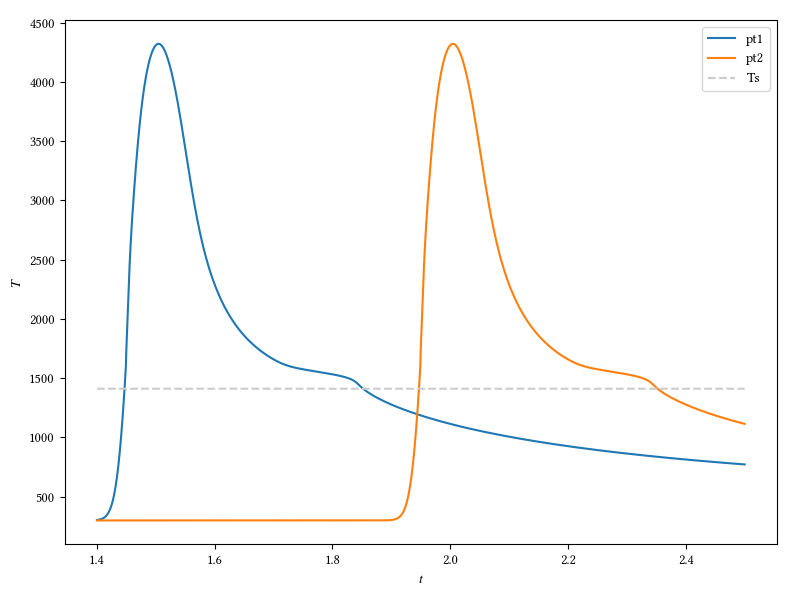

<IPython.core.display.Javascript object>


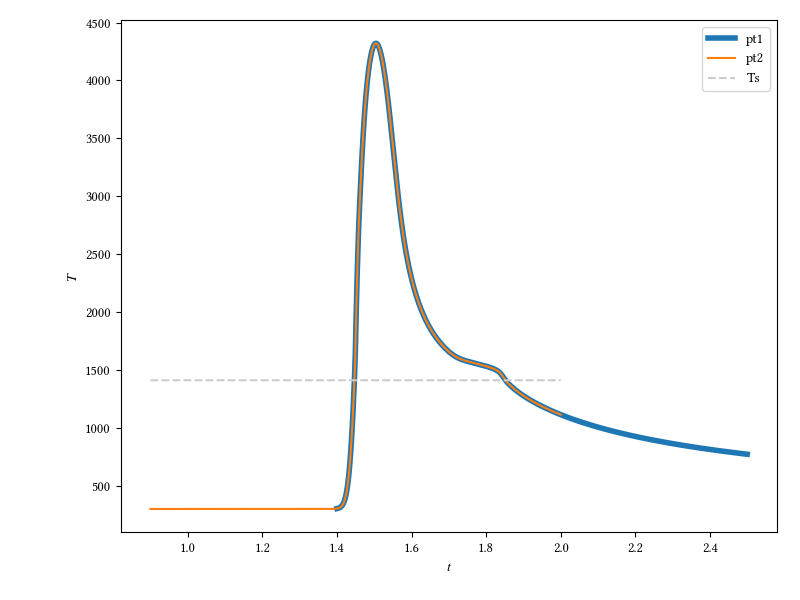

<IPython.core.display.Javascript object>


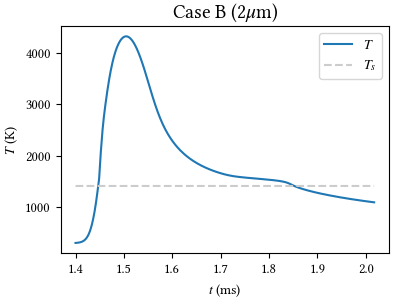

CR:  3.02e+06 C/s
MPl: 324 um
MPw: 130 um
MPd:  38 um


In [7]:
pt1 = sp.loadtxt("stvB2um_pt1.txt")
pt2 = sp.loadtxt("stvB2um_pt2.txt")

# fig1
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.03,0.03,1,1])

#ax.set_title("Case B", fontsize=20)
ax.set_xlabel("$t$")
ax.set_ylabel("$T$")
ax.plot(pt1[:,0], pt1[:,1], '-', label="pt1")
ax.plot(pt2[:,0], pt2[:,1], '-', label="pt2")
ax.plot(pt2[:,0], sp.ones(pt2.shape[0])*1410, '--', color='0.8', label="Ts")
ax.legend(loc=1);

#fig.savefig('figures/stvB.png')

# fig2
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.1,0.05,1,1])

ax.set_xlabel("$t$")
ax.set_ylabel("$T$")
ax.plot(pt1[:,0], pt1[:,1], '-', lw=4, label="pt1")
ax.plot(pt2[:,0] - 0.4 / 800e-3, pt2[:,1], '-', label="pt2")
ax.plot(pt2[:,0] - 0.4 / 800e-3, sp.ones(pt2.shape[0])*1410, '--', color='0.8', label="Ts")
ax.legend(loc=1);

# fig3
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.05,0.03,1.03,0.98])

#start=5000
end=14000
ax.set_title("Case B (2$\mu$m)", fontsize=14)
ax.set_xlabel("$t$ (ms)")
ax.set_ylabel("$T$ (K)")
ax.plot(pt1[:end,0], pt1[:end,1], '-', label="$T$")
ax.plot(pt1[:end,0], sp.ones(end)*1410, '--', color='0.8', label="$T_s$")
ax.legend(loc=1);

fig.savefig('stvB2um.png', dpi=200)

metrics(pt1, 1410, 800e-3)
print("MPw: 130 um")
print("MPd:  38 um")

<IPython.core.display.Javascript object>


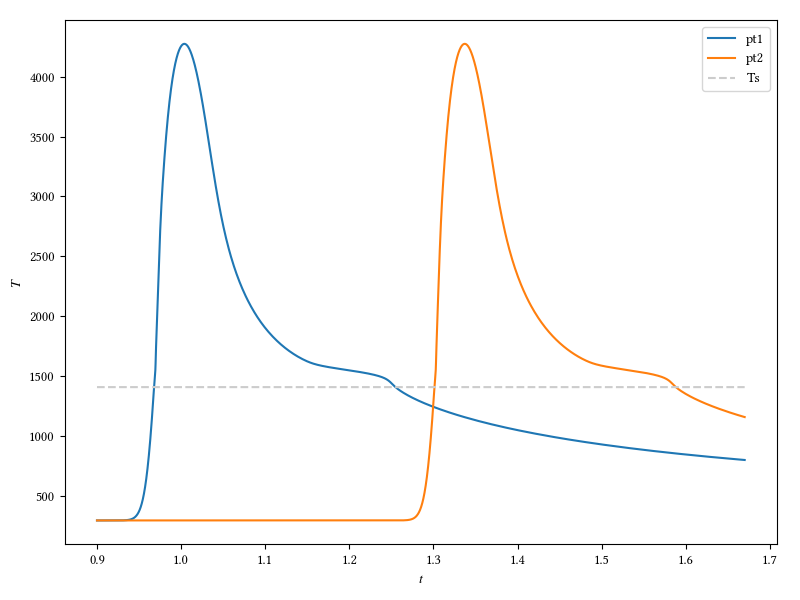

<IPython.core.display.Javascript object>


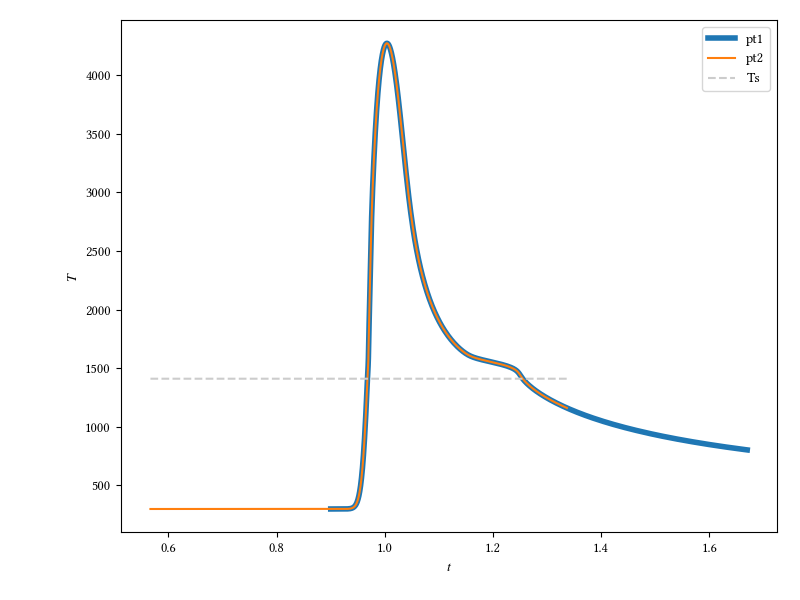

<IPython.core.display.Javascript object>


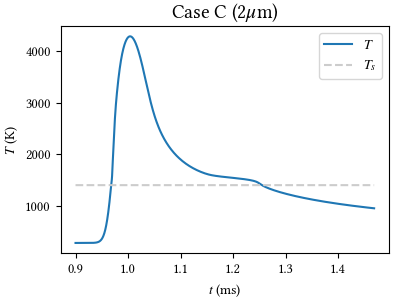

CR:  4.26e+06 C/s
MPl: 344 um
MPw: 110 um
MPd:  32 um


In [8]:
pt1 = sp.loadtxt("stvC2um_pt1.txt")
pt2 = sp.loadtxt("stvC2um_pt2.txt")

# fig1
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.03,0.03,1,1])

#ax.set_title("Case C", fontsize=20)
ax.set_xlabel("$t$")
ax.set_ylabel("$T$")
ax.plot(pt1[:,0], pt1[:,1], '-', label="pt1")
ax.plot(pt2[:,0], pt2[:,1], '-', label="pt2")
ax.plot(pt2[:,0], sp.ones(pt2.shape[0])*1410, '--', color='0.8', label="Ts")
ax.legend(loc=1);

#fig.savefig('figures/stvC.png')

# fig2
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.1,0.05,1,1])

ax.set_xlabel("$t$")
ax.set_ylabel("$T$")
ax.plot(pt1[:,0], pt1[:,1], '-', lw=4, label="pt1")
ax.plot(pt2[:,0] - 0.4 / 1200e-3, pt2[:,1], '-', label="pt2")
ax.plot(pt2[:,0] - 0.4 / 1200e-3, sp.ones(pt2.shape[0])*1410, '--', color='0.8', label="Ts")
ax.legend(loc=1);

# fig3
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
fig.tight_layout(rect=[0.05,0.03,1.03,0.98])

#start=5000
end=14000
ax.set_title("Case C (2$\mu$m)", fontsize=14)
ax.set_xlabel("$t$ (ms)")
ax.set_ylabel("$T$ (K)")
ax.plot(pt1[:end,0], pt1[:end,1], '-', label="$T$")
ax.plot(pt1[:end,0], sp.ones(end)*1410, '--', color='0.8', label="$T_s$")
ax.legend(loc=1);

fig.savefig('stvC2um.png', dpi=200)

metrics(pt1, 1410, 1200e-3)
print("MPw: 110 um")
print("MPd:  32 um")